Henry Ho 304723723

Justin Sarenas 304675389

# Homework 4 Question 2

## a- Read the dataset file "Heart_short.csv" and assign it to a Pandas Dataframe

In [24]:
# Import Pandas
import pandas as pd

In [25]:
# Creating an empty dataframe
hearts_df = pd.DataFrame()

# Reading a CSV file from the web
hearts_df = pd.read_csv('https://raw.githubusercontent.com/ellipsclamation/cs4661_data_science/master/Datasets/Heart_short.csv')

print(hearts_df)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3   No
1     67     160   286        2    108      1.5  Yes
2     67     120   229        2    129      2.6  Yes
3     37     130   250        0    187      3.5   No
4     41     130   204        2    172      1.4   No
5     56     120   236        0    178      0.8   No
6     62     140   268        2    160      3.6  Yes
7     57     120   354        0    163      0.6   No
8     63     130   254        2    147      1.4  Yes
9     53     140   203        2    155      3.1  Yes
10    57     140   192        0    148      0.4   No
11    56     140   294        2    153      1.3   No
12    56     130   256        2    142      0.6  Yes
13    44     120   263        0    173      0.0   No
14    52     172   199        0    162      0.5   No
15    57     150   168        0    174      1.6   No
16    48     110   229        0    168      1.0  Yes
17    54     140   239        0    160      1.

## b- Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [26]:
# Creating the Feature Matrix for hearts dataset:

# Create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

# use the above list to select the features from the original DataFrame
X = hearts_df[feature_cols]

# print the first 5 rows
X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [27]:
# checking the size of Feature Matrix X:
print(X.shape)

(281, 6)


In [28]:
# select a Series of labels (the last column) from the DataFrame
y = hearts_df['AHD'].eq('Yes').mul(1)

# checking the label vector by printing every 10 values
y[::10]

0      0
10     0
20     0
30     0
40     0
50     0
60     0
70     0
80     0
90     0
100    0
110    0
120    0
130    0
140    0
150    1
160    0
170    1
180    0
190    0
200    0
210    1
220    0
230    0
240    0
250    1
260    1
270    1
280    0
Name: AHD, dtype: int32

### Normalize dataset using mean normalization

In [29]:
# Normalize the feature columns
normalized_hearts_df = (X - X.mean()) / X.std()

X = normalized_hearts_df[feature_cols]

# Re-add the AHD label to the normalized dataframe
normalized_hearts_df['AHD'] = y

print(normalized_hearts_df)

          Age    RestBP      Chol   RestECG     MaxHR   Oldpeak  AHD
0    0.946195  0.748449 -0.258137  1.045571 -0.009177  1.129814    0
1    1.382960  1.595579  0.751963  1.045571 -1.844840  0.434734    1
2    1.382960 -0.663434 -0.334371  1.045571 -0.927008  1.390469    1
3   -1.892778 -0.098681  0.065857 -0.966795  1.607955  2.172434    0
4   -1.456013 -0.098681 -0.810834  1.045571  0.952361  0.347849    0
5    0.181856 -0.663434 -0.200962 -0.966795  1.214599 -0.173461    0
6    0.837003  0.466072  0.408910  1.045571  0.427886  2.259319    1
7    0.291047 -0.663434  2.047940 -0.966795  0.559005 -0.347231    0
8    0.946195 -0.098681  0.142091  1.045571 -0.140296  0.347849    1
9   -0.145718  0.466072 -0.829892  1.045571  0.209355  1.824894    1
10   0.291047  0.466072 -1.039536 -0.966795 -0.096589 -0.521001    0
11   0.181856  0.466072  0.904431  1.045571  0.121942  0.260964    0
12   0.181856 -0.098681  0.180208  1.045571 -0.358827 -0.347231    1
13  -1.128439 -0.663434  0.313617 

## c- Split the dataset into testing and training sets with the following parameters:
- test_size=0.2
- random_state=3

In [30]:
# Picks 20% of data samples for testing set and 80% for training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(X_test)
print('\n')
print(y_test)

          Age    RestBP      Chol   RestECG     MaxHR   Oldpeak
253  1.055386  2.160332 -0.372488  1.045571  0.209355 -0.347231
74   0.509430 -1.228188 -0.143786  1.045571 -0.358827  0.174079
230  1.055386 -0.211632  0.313617 -0.966795 -1.975959 -0.694771
38   0.072665  0.014270  2.028882 -0.966795 -0.795890  0.174079
16  -0.691674 -1.228188 -0.334371 -0.966795  0.777536  0.000309
66  -0.145718  0.353122 -0.239079  1.045571  0.427886 -0.868541
31   0.618621 -0.832860 -0.315313 -0.966795  0.427886  0.347849
123 -0.800865 -1.341138 -0.067553 -0.966795  0.078236 -0.868541
177  0.509430  1.595579  0.504202  1.045571 -1.101833 -0.868541
175 -1.019248  0.353122 -0.200962  1.045571  0.078236 -0.694771
155  0.181856  0.014270 -1.192004  1.045571 -1.975959  0.956044
259 -0.800865 -0.098681  0.123032 -0.966795  1.258305 -0.868541
50  -0.364100 -0.381058 -0.639307  1.045571 -1.101833  0.347849
82  -0.582483 -0.663434 -1.115770 -0.966795 -0.489946  0.869159
25  -0.473292 -0.663434 -0.524956 -0.966

## d- Use Logistic Regression Classifier to predict Heart Disease occurance based on the training/testing datasets. Then, compute and report the accuracy.

In [31]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

### Training on training set

In [32]:
# Training only on the training set using the method "fit" 
# of the object along with training dataset and labels to train the model.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Testing on testing set

In [33]:
# Testing on the testing set:
y_predict_logreg = logreg.predict(X_test)

print(y_predict_logreg)

[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]


### Logistic Regression Accuracy Evaluation

In [34]:
from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_predict_logreg)

print(accuracy_logreg)

0.701754385965


## Use Logistic Regression Classifier to predict the probability of Heart Disease based on training/testing datasets. Then, Plot the Roc Curve for this classifier, and also compute the AUC (Area Under Curve for ROC).

### Predict the probability of Heart Disease

In [35]:
# Estimating the probability (likelihood) of Each Label: 
y_proba_logreg = logreg.predict_proba(X_test)

print(y_proba_logreg)

[[ 0.49898068  0.50101932]
 [ 0.55132439  0.44867561]
 [ 0.43033116  0.56966884]
 [ 0.38123077  0.61876923]
 [ 0.85085558  0.14914442]
 [ 0.76182486  0.23817514]
 [ 0.75491634  0.24508366]
 [ 0.87028959  0.12971041]
 [ 0.34479652  0.65520348]
 [ 0.64862278  0.35137722]
 [ 0.09961851  0.90038149]
 [ 0.91868858  0.08131142]
 [ 0.28663933  0.71336067]
 [ 0.45291245  0.54708755]
 [ 0.67931518  0.32068482]
 [ 0.86373697  0.13626303]
 [ 0.10968319  0.89031681]
 [ 0.65991147  0.34008853]
 [ 0.1060863   0.8939137 ]
 [ 0.34959659  0.65040341]
 [ 0.87395955  0.12604045]
 [ 0.85567804  0.14432196]
 [ 0.23412595  0.76587405]
 [ 0.93223381  0.06776619]
 [ 0.12137708  0.87862292]
 [ 0.57497186  0.42502814]
 [ 0.706665    0.293335  ]
 [ 0.43620176  0.56379824]
 [ 0.66552836  0.33447164]
 [ 0.79731843  0.20268157]
 [ 0.29737619  0.70262381]
 [ 0.13137948  0.86862052]
 [ 0.16259601  0.83740399]
 [ 0.87986747  0.12013253]
 [ 0.79173535  0.20826465]
 [ 0.01177934  0.98822066]
 [ 0.06057263  0.93942737]
 

In [36]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_logreg)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_proba_logreg)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_proba_logreg[:,1])

253    0
74     1
230    0
38     1
16     1
66     0
31     1
123    1
177    1
175    0
155    1
259    0
50     0
82     1
25     0
73     1
264    1
162    1
214    1
270    1
84     1
157    0
196    0
46     0
229    1
193    0
64     0
65     0
108    0
252    1
185    1
223    1
6      1
111    0
103    0
101    1
213    1
265    0
37     1
3      0
98     1
58     0
14     0
266    0
161    0
225    1
83     0
205    0
23     1
43     0
67     0
24     1
200    0
61     1
198    0
247    0
5      0
Name: AHD, dtype: int32
[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]
[[ 0.49898068  0.50101932]
 [ 0.55132439  0.44867561]
 [ 0.43033116  0.56966884]
 [ 0.38123077  0.61876923]
 [ 0.85085558  0.14914442]
 [ 0.76182486  0.23817514]
 [ 0.75491634  0.24508366]
 [ 0.87028959  0.12971041]
 [ 0.34479652  0.65520348]
 [ 0.64862278  0.35137722]
 [ 0.09961851  0.90038149]
 [ 0.91868858  0.08131142]
 [ 0.28663933  0.71336

### True Positive Rate and False Positive Rate

In [37]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_logreg[:,1], pos_label=1)

print(fpr)
print(tpr)

[ 0.          0.03333333  0.03333333  0.13333333  0.13333333  0.2         0.2
  0.26666667  0.26666667  0.4         0.4         0.5         0.5
  0.53333333  0.53333333  0.63333333  0.63333333  0.7         0.7
  0.73333333  0.73333333  0.76666667  0.76666667  0.8         0.8         1.        ]
[ 0.03703704  0.03703704  0.40740741  0.40740741  0.62962963  0.62962963
  0.66666667  0.66666667  0.7037037   0.7037037   0.74074074  0.74074074
  0.77777778  0.77777778  0.81481481  0.81481481  0.85185185  0.85185185
  0.88888889  0.88888889  0.92592593  0.92592593  0.96296296  0.96296296
  1.          1.        ]


### AUC

In [38]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.753086419753


### ROC Curve

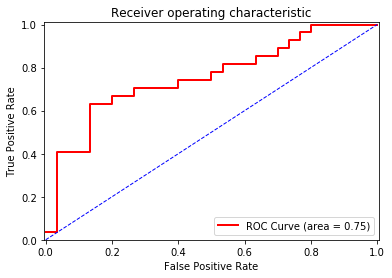

In [39]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()